#### **Load data into dataframe**

In [2]:
import pandas as pd

# URL of the CSV file
url = 'https://raw.githubusercontent.com/kjcho92/projects/master/aznb/data/Telco-Customer-Churn.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

In [16]:
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NumOfAdditionalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes,1
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70,No,3
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes,0
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.20,No,0


In [ ]:
# pip install matplotlib seaborn mpld3

#### **Behavior of Churned Customers**

Understanding the behavior of churned customers is crucial for developing effective strategies to reduce churn. Here are some common behaviors and factors associated with churned customers, as well as approaches for predicting customer churn: 
 
**1. Shorter Tenure:**
- Churned customers often have shorter tenures, indicating that they haven't been with the company for an extended period. This suggests that newer customers may be more prone to churn.

**2. Higher Monthly Charges:**
- Churned customers may have experienced higher monthly charges, either due to subscribed services or other factors. This could be an important predictor of churn.
 
**3. Month-to-Month Contracts:**
- Customers on month-to-month contracts are more likely to churn compared to those with longer-term contracts. The flexibility of month-to-month contracts makes it easier for customers to switch providers.

**4. Paperless Billing:**
- Churned customers might be more likely to use paperless billing. The convenience of electronic transactions might not be enough to retain these customers.
 
**5. Lack of Additional Services:**
- Customers who only subscribe to basic services and don't opt for additional features like streaming or tech support may be more prone to churn.

**6. Customer Service Interaction:**
- Churned customers might have had negative experiences with customer service, such as difficulties in getting issues resolved or dissatisfaction with support.
 
**7. High Total Charges:**
- While higher monthly charges can be a factor, customers with overall high total charges may also be more sensitive to costs, contributing to churn.

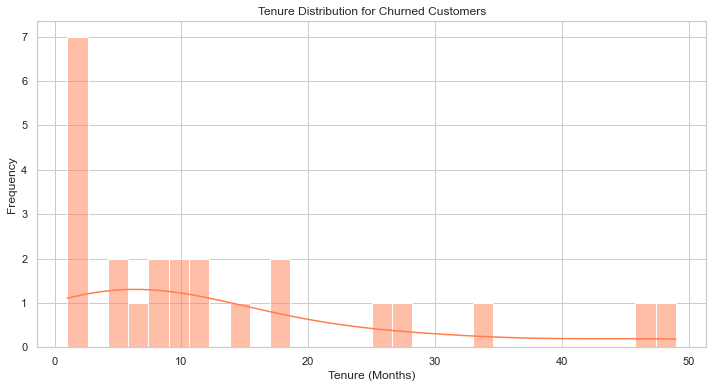

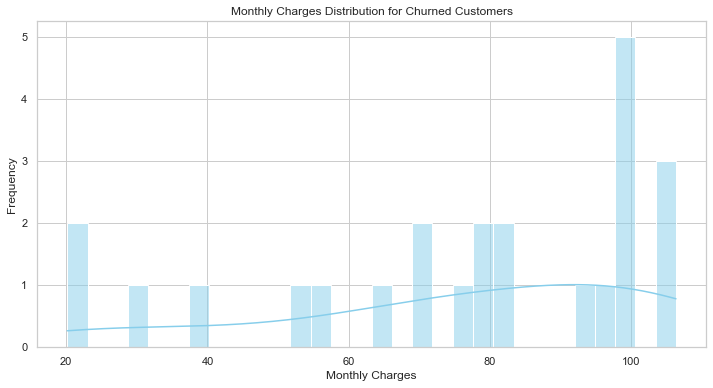

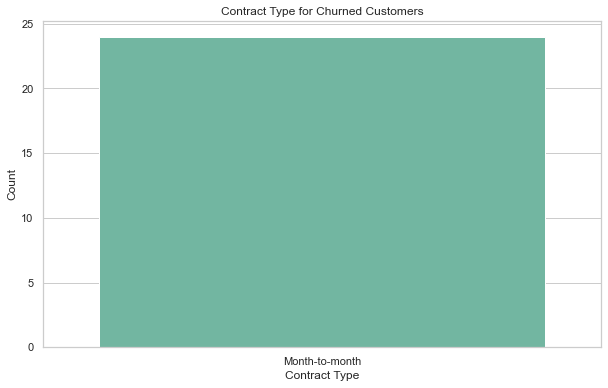

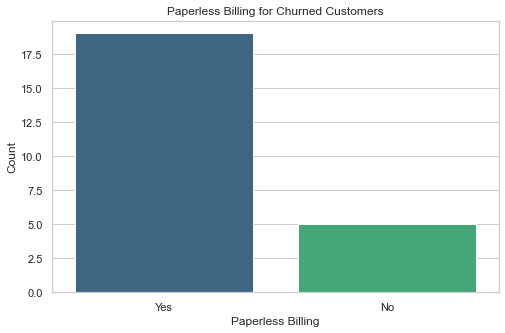

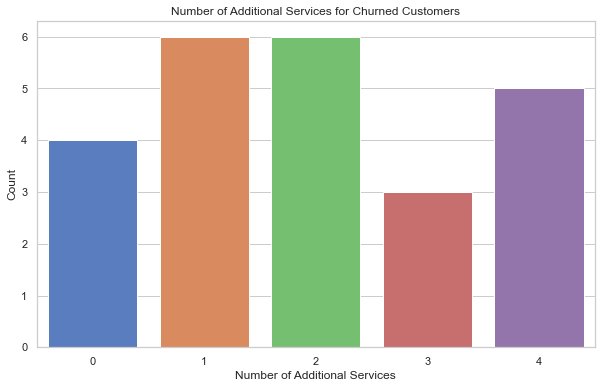

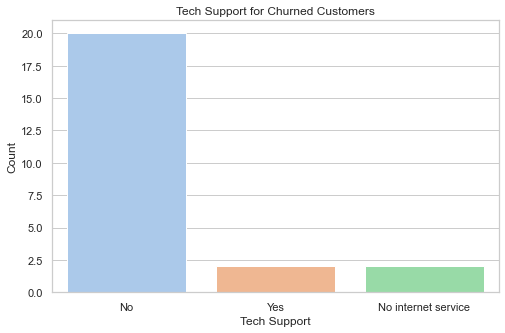

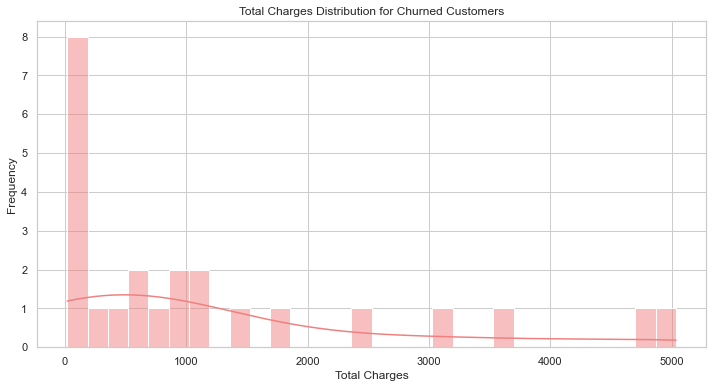

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot 1: Tenure Distribution for Churned Customers
plt.figure(figsize=(12, 6))
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes'], kde=True, color='coral', bins=30)
plt.title('Tenure Distribution for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Monthly Charges Distribution for Churned Customers
plt.figure(figsize=(12, 6))
sns.histplot(x='MonthlyCharges', data=df[df['Churn'] == 'Yes'], kde=True, color='skyblue', bins=30)
plt.title('Monthly Charges Distribution for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Contract Type for Churned Customers
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df[df['Churn'] == 'Yes'], palette='Set2')
plt.title('Contract Type for Churned Customers')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Plot 4: Paperless Billing for Churned Customers
plt.figure(figsize=(8, 5))
sns.countplot(x='PaperlessBilling', data=df[df['Churn'] == 'Yes'], palette='viridis')
plt.title('Paperless Billing for Churned Customers')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

# Plot 5: Number of Additional Services for Churned Customers
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumOfAdditionalServices'] = df[additional_services].apply(lambda x: x.eq('Yes').sum(), axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfAdditionalServices', data=df[df['Churn'] == 'Yes'], palette='muted')
plt.title('Number of Additional Services for Churned Customers')
plt.xlabel('Number of Additional Services')
plt.ylabel('Count')
plt.show()

# Plot 6: Customer Service Interaction for Churned Customers
plt.figure(figsize=(8, 5))
sns.countplot(x='TechSupport', data=df[df['Churn'] == 'Yes'], palette='pastel')
plt.title('Tech Support for Churned Customers')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

# Plot 7: Total Charges Distribution for Churned Customers
plt.figure(figsize=(12, 6))
sns.histplot(x='TotalCharges', data=df[df['Churn'] == 'Yes'], kde=True, color='lightcoral', bins=30)
plt.title('Total Charges Distribution for Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


#### **Explore two potential top reasons for customer churn: Month-to-Month Contracts and Higher Monthly Charges**

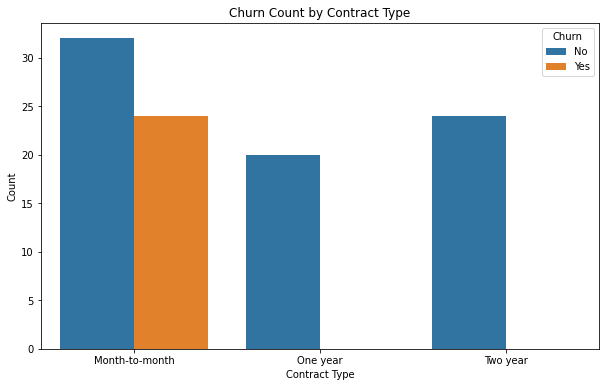

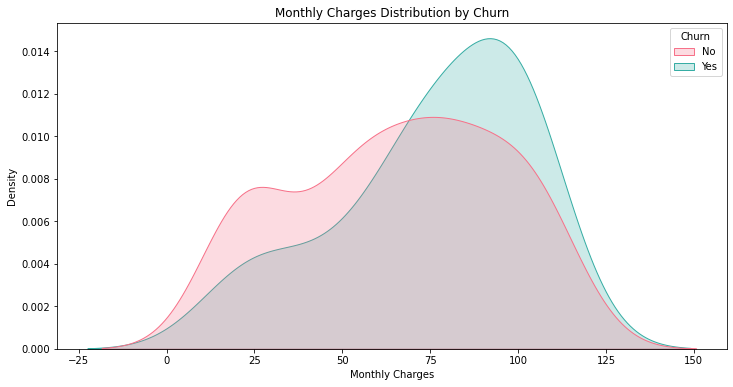

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the CSV file
url = 'https://raw.githubusercontent.com/kjcho92/projects/master/aznb/data/Telco-Customer-Churn.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Reason 1: Month-to-Month Contracts
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Reason 2: Higher Monthly Charges
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', common_norm=False, fill=True, palette='husl')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()


#### **The behavior of churned users**

###### To analyze the behavior of churned users, you can look at various features in the dataset that might be indicative of churn. For demonstration purposes, let's consider the following features: MonthlyCharges, TotalCharges, and tenure. We'll compare the distributions of these features for churned and non-churned users using box plots.


**1. Monthly Charges for Churned Users:**
- The first box plot compares the distribution of monthly charges for churned and non-churned users. It helps to identify whether higher monthly charges are associated with churn.

**2. Total Charges for Churned Users:**
- The second box plot compares the distribution of total charges for churned and non-churned users. It provides insights into the overall spending behavior of churned users.

**3. Tenure for Churned Users:**
- The third box plot compares the tenure (duration of the customer with the company) for churned and non-churned users. It helps to understand whether customers with shorter tenure are more likely to churn.

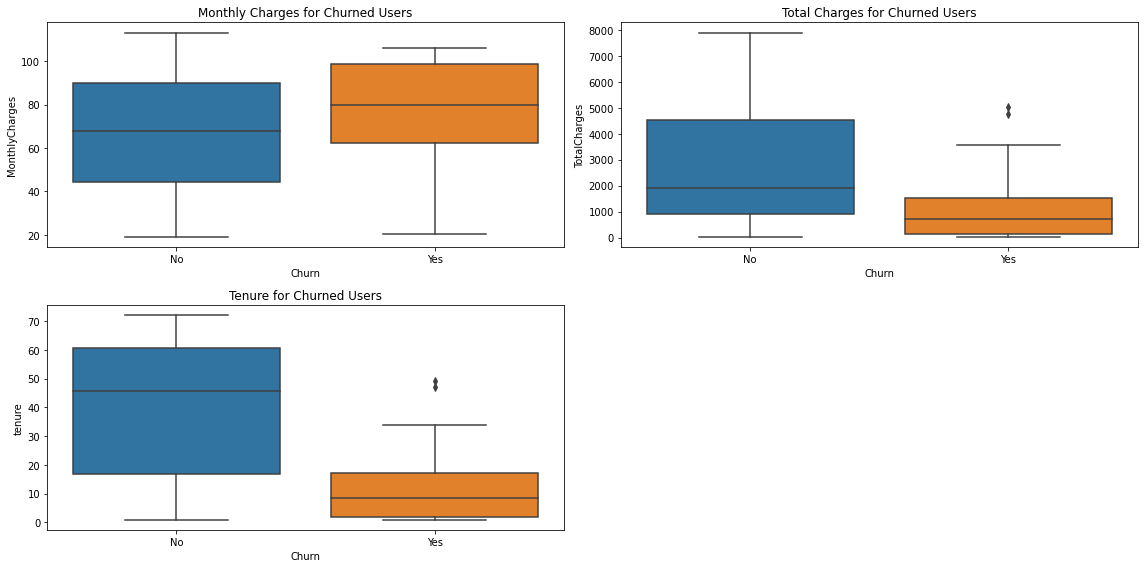

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the CSV file
url = 'https://raw.githubusercontent.com/kjcho92/projects/master/aznb/data/Telco-Customer-Churn.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Select features for analysis
selected_features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']

# Create a DataFrame with selected features
selected_df = df[selected_features]

# Plotting behavior of churned users
plt.figure(figsize=(16, 8))

# Box plot for Monthly Charges
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges for Churned Users')

# Box plot for Total Charges
plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges for Churned Users')

# Box plot for Tenure
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure for Churned Users')

plt.tight_layout()
plt.show()


#### **Prevent Customer Churn**

Preventing customer churn involves understanding the factors that contribute to it and implementing strategies to retain customers. Here are some general approaches, and I'll provide a simple Python code snippet for demonstrating a basic churn prediction model:

**1. Provide Incentives:**
- Offer discounts, loyalty programs, or special promotions to encourage customers to stay.

**2. Improve Customer Service:**
- Enhance customer service to address issues promptly and improve overall customer satisfaction.

**3. Personalized Marketing:**
- Use customer data to personalize marketing efforts and provide targeted promotions or offers.

**4. Long-Term Contracts:**
- Encourage customers to sign up for long-term contracts, providing stability and reducing the likelihood of churn.

**5. Monitor Customer Feedback:**
- Regularly gather and analyze customer feedback to identify areas for improvement.

**6. Proactive Communication:**
- Communicate with customers proactively, informing them of new features, promotions, or improvements in service.

RadioButtons(description='Select Feature:', index=18, options=('customerID', 'gender', 'SeniorCitizen', 'Partn…

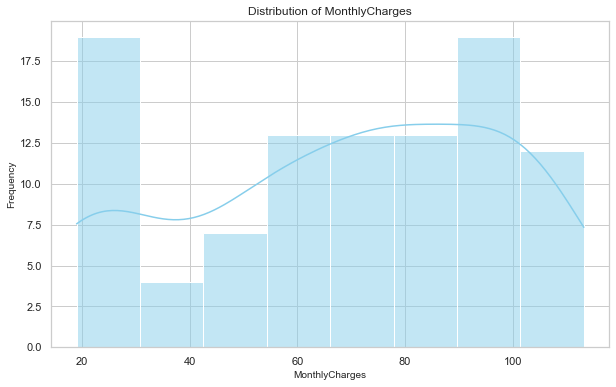

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import mpld3

# URL of the CSV file
url = 'https://raw.githubusercontent.com/kjcho92/projects/master/aznb/data/Telco-Customer-Churn.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Set the style for seaborn
sns.set(style="whitegrid")

# Widget: Select Feature for Histogram
feature_radio = widgets.RadioButtons(
    options=df.columns,
    value='MonthlyCharges',
    description='Select Feature:'
)

# Function to update the plot based on the selected feature
def update_plot(selected_feature):
    plt.figure(figsize=(10, 6))
    
    sns.histplot(x=selected_feature, data=df, kde=True, color='skyblue')
    plt.title(f'Distribution of {selected_feature}')
    plt.xlabel(selected_feature)
    plt.ylabel('Frequency')
    
    # Convert the Matplotlib plot to HTML using mpld3
    html_content = mpld3.fig_to_html(plt.gcf())
    
    clear_output(wait=True)
    display(feature_radio)
    # display(HTML(html_content))

# Display the radio button widget
display(feature_radio)

# Update the plot initially
update_plot(feature_radio.value)

# Attach the observer function to the radio button widget
feature_radio.observe(lambda change: update_plot(change.new), names='value')
